## Numerical Methods Week 8
# Ordinary Differential Equations
## Based on Tim Sauer's "Numerical Analysis" (Chapter 6, 6.1-6.4)

#### Importing required Python modules

In [1]:
import numpy as np
import pandas as pd
import sympy as sp
import scipy
from scipy.integrate import ode
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

from IPython.display import Image
import warnings; warnings.simplefilter('ignore')

## 6.1 Initial Value Problems (IVP)

<span style="font-size:large;"><b>Initial value problem (IVP) for a first order differential equation</b>:
<p/>
    
<span style="font-size:large;">
\begin{align}
&y' = f(t,y), {\mbox{ for }} t \in [a,b],\\
&y(a) = y_a.
\end{align}

### <span style="color:#19bfc2">EXAMPLE 6.1</span>

<span style="font-size:large;">Draw the slope field of the IVP:
<p/>
    
<span style="font-size:large;">
\begin{align}
&y' = ty + y^3, {\mbox{ for }} t \in [0,1],\\
&y(a) = y_0.
\end{align}

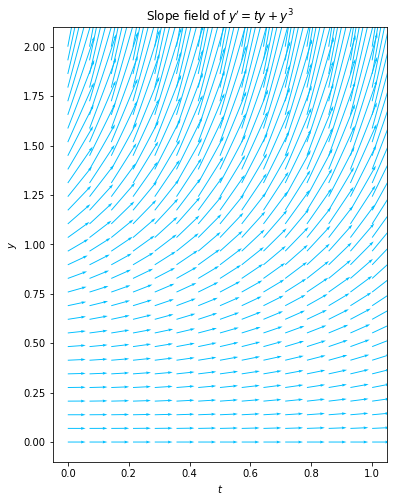

In [2]:
fig, ax = plt.subplots(figsize=(6,8))
times = np.linspace(0, 1, 15)
x = np.linspace(0 ,2, 30)
T, X = np.meshgrid(times, x)   # make a grid that roughly matches the Strogatz grid  

dxdt = X*T+X**3            # the equation of interest
dt = 0.8*np.ones(X.shape)  # a constant value (.5 is just so segments don't run into each other -- given spacing of times array
dx = dxdt * dt             # given dt, now calc dx for the line segment

plt.quiver(T, X, dt, dx, headwidth=3., angles='xy', color='deepskyblue', scale=15.)
# ax.set_aspect('equal')
ax.set_title(r"Slope field of $y' = ty + y^3$") 
ax.set_xlabel(r'$\mathit{t}$')
ax.set_ylabel(r'$\mathit{y}$')
plt.show()

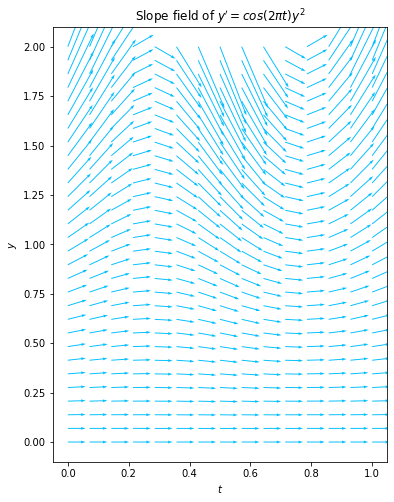

In [3]:
fig, ax = plt.subplots(figsize=(6,8))
times = np.linspace(0, 1, 15)
x = np.linspace(0 ,2, 30)
T, X = np.meshgrid(times, x)   # make a grid that roughly matches the Strogatz grid  

dxdt = np.cos(2*np.pi*T)*X**2            # the equation of interest
dt = 0.8*np.ones(X.shape)  # a constant value (.5 is just so segments don't run into each other -- given spacing of times array
dx = dxdt * dt             # given dt, now calc dx for the line segment

plt.quiver(T, X, dt, dx, headwidth=3., angles='xy', color='deepskyblue', scale=15.)
# ax.set_aspect('equal')
ax.set_title(r"Slope field of $y' = cos (2 \pi t) y^2$") 
ax.set_xlabel(r'$\mathit{t}$')
ax.set_ylabel(r'$\mathit{y}$')
plt.show()

### 6.1.1 Euler's Method

<span style="font-size:large;"><b>Euler's Method</b>:
    
<span style="font-size:large;">
\begin{align}
w_0 &= y_0\\
w_{i+1} &= w_i + hf(t_i,w_i)
\end{align}    

In [4]:
def Euler(F,ta,ya,tb,h):
    # If [a,b] is the interval where the ode y'=F(t,y) is defined
    # ta=t(a), ya=y(ta) and tb=t(b)
    X = []
    Y = []
    X.append(ta) 
    Y.append(ya) 
    t,y=ta,ya
    while t < tb:
        y = y + h*F(y,t) 
        t = t + h 
        X.append(t) 
        Y.append(y)
    if X[-1] > tb:
        return X[:-1],Y[:-1] 
    else:
        return np.array(X),np.array(Y)

def Euler_df(X,Y):
    # X,Y is the output of the function Euler(F,ta,ya,tb,h)
    ys = odeint(F, ya, X) 
    Z = np.array(ys).flatten()
    ZZ=Z-Y
    df=pd.DataFrame(
    {'$t_i$': X, #xs,
     '$w_i$': Y,  
     '$y_i$': Z,
     '$e_i$': ZZ
    })
    return df

### <span style="color:#19bfc2">EXAMPLE 6.2</span>

<span style="font-size:large;">Apply Euler’s Method to the IVP of Example 6.1, with initial condition $y_0 = 1$.

a. Step size $h = 0.2$

In [5]:
F=lambda y,t:t*y+t**3
ta=0
ya=1
tb=1
h=0.2
X,Y=Euler(F,ta,ya,tb,h)
df=Euler_df(X,Y)
df

,$t_i$,$w_i$,$y_i$,$e_i$
0,0.0,1.000000,1.000000,0.000000
1,0.2,1.000000,1.020604,0.020604
2,0.4,1.041600,1.089861,0.048261
3,0.6,1.137728,1.231652,0.093924
4,0.8,1.317455,1.491384,0.173928
5,1.0,1.630648,1.946164,0.315516


In [6]:
t,y,a,b,ya = sp.symbols("t,y,a,b,y_a")
y=sp.Function("y")
ode=y(t).diff(t)-t*y(t)-t**3
ode_sol=sp.dsolve(ode)
ics={y(a):ya}
C_eq = sp.Eq(ode_sol.lhs.subs(t, a).subs(ics), ode_sol.rhs.subs(t, a))
C_sol = sp.solve(C_eq)
y=ode_sol.subs(C_sol[0]).subs(ya,ya)

In [7]:
sp.Eq(ode)

Eq(-t**3 - t*y(t) + Derivative(y(t), t), 0)

In [8]:
ode_sol

Eq(y(t), C1*exp(t**2/2) - t**2 - 2)

In [9]:
y.subs(a,0).subs(ya,1)

Eq(y(t), -t**2 + 3*exp(t**2/2) - 2)

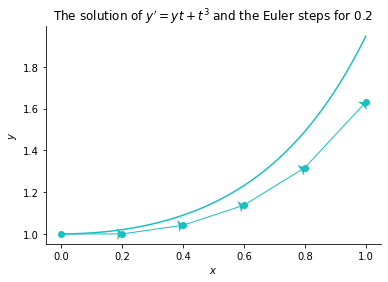

In [10]:
F=lambda y,t:y*t+t**3
ta=0
ya=1
tb=1
h=0.2
X,Y=Euler(F,ta,ya,tb,h)

fig = plt.figure()  
ax = fig.add_subplot(1, 1, 1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
p=plt.plot(X,Y,'o',color="#19bfc2")
plt.quiver(X[:-1], Y[:-1], X[1:]-X[:-1], Y[1:]-Y[:-1], scale_units='xy', angles='xy', scale=1,width=0.003,headwidth=12,color="#19bfc2")

t,y,a,b,ya = sp.symbols("t,y,a,b,y_a")
y=sp.Function("y")
ode=y(t).diff(t)-t*y(t)-t**3
ode_sol=sp.dsolve(ode)
ics={y(a):ya}
C_eq = sp.Eq(ode_sol.lhs.subs(t, a).subs(ics), ode_sol.rhs.subs(t, a))
C_sol = sp.solve(C_eq)
y=ode_sol.subs(C_sol[0]).subs(ya,1)
ys=y.rhs
ys=sp.lambdify(t,ys,['sympy']) #'numpy')

Xs = np.linspace(min(X), max(X), 100)
Ys = [] 
for n in range(0,len(Xs)):
    Ys.append(ys(Xs[n]).subs(a,0).evalf())

p=plt.plot(Xs,Ys,color="#19bfc2")
plt.xlabel('$x$') 
plt.ylabel('$y$') 
ti="The solution of $y' = yt + t^3$ and the Euler steps for %.1f" %h 
plt.title(ti)
plt.show();

b. Step size $h = 0.1$

In [11]:
F=lambda y,t:t*y+t**3
ta=0
ya=1
tb=1
h=0.1
X,Y=Euler(F,ta,ya,tb,h)
df=Euler_df(X,Y)
df

,$t_i$,$w_i$,$y_i$,$e_i$
0,0.0,1.000000,1.000000,0.000000
1,0.1,1.000000,1.005038,0.005038
2,0.2,1.010100,1.020604,0.010504
3,0.3,1.031102,1.048084,0.016982
4,0.4,1.064735,1.089861,0.025126
5,0.5,1.113724,1.149446,0.035721
6,0.6,1.181911,1.231652,0.049742
7,0.7,1.274425,1.342864,0.068439
8,0.8,1.397935,1.491384,0.093448
9,0.9,1.560970,1.687908,0.126938


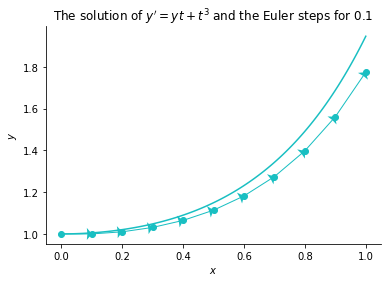

In [12]:
F=lambda y,t:y*t+t**3
ta=0
ya=1
tb=1
h=0.1
X,Y=Euler(F,ta,ya,tb,h)
X,Y=np.array(X),np.array(Y)

fig = plt.figure()  
ax = fig.add_subplot(1, 1, 1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
p=plt.plot(X,Y,'o',color="#19bfc2")
plt.quiver(X[:-1], Y[:-1], X[1:]-X[:-1], Y[1:]-Y[:-1], scale_units='xy', angles='xy', scale=1,width=0.003,headwidth=12,color="#19bfc2")

t,y,a,b,ya = sp.symbols("t,y,a,b,y_a")
y=sp.Function("y")
ode=y(t).diff(t)-t*y(t)-t**3
ode_sol=sp.dsolve(ode)
ics={y(a):ya}
C_eq = sp.Eq(ode_sol.lhs.subs(t, a).subs(ics), ode_sol.rhs.subs(t, a))
C_sol = sp.solve(C_eq)
y=ode_sol.subs(C_sol[0]).subs(ya,1)
ys=y.rhs
ys=sp.lambdify(t,ys,['sympy']) #'numpy')

Xs = np.linspace(min(X), max(X), 100)
Ys = [] 
for n in range(0,len(Xs)):
    Ys.append(ys(Xs[n]).subs(a,0).evalf())

p=plt.plot(Xs,Ys,color="#19bfc2")
plt.xlabel('$x$') 
plt.ylabel('$y$') 
ti="The solution of $y' = yt + t^3$ and the Euler steps for %.1f" %h 
plt.title(ti)
plt.show();

### <span style="color:#19bfc2">EXAMPLE 6.3</span>

<span style="font-size:large;">Find the Euler’s Method formula for the following initial value problem: 
    
<p/>
    
<span style="font-size:large;">
\begin{align}
&y' = cy, {\mbox{ for }} t \in [0,1],\\
&y(0) = y_0.
\end{align}

The Euler's method gives:
\begin{align}
&w_0 = y_0, \\
&w_{i+1} = w_i + hcw_i = (1 + hc) \, w_i, \mbox{ for } i = 1, 2, 3, \ldots.
\end{align}

In [13]:
t,y,c,y0,w,i,h = sp.symbols("t,y,c,y0,w,i,h")
y=sp.Function("y")
w=sp.Function("w")
ode=y(t).diff(t)-c*y(t)
ode_sol=sp.dsolve(ode)
ics={y(0):y0}
C_eq = sp.Eq(ode_sol.lhs.subs(t, 0).subs(ics), ode_sol.rhs.subs(t, 0))
C_sol = sp.solve(C_eq)
y=ode_sol.subs(C_sol[0]) #.subs(y0,0)
y

Eq(y(t), y0*exp(c*t))

In [14]:
f = w(i+1) - (1 + h*c)*w(i)
de_sol=sp.rsolve(f,w(i),{w(0):y0}).subs(h,t/i)
sp.Eq(w,de_sol)

Eq(w, y0*(c*t/i + 1)**i)

In [15]:
sp.limit(de_sol,i,sp.oo)

y0*exp(c*t)

### 6.1.2 Existence, uniqueness, and continuity for solutions

A function $f(t,y)$ is **Lipschitz continuous** in the variable $y$ on the rectangle $S = [a,b] \times [\alpha,\beta]$ if there exists a constant $L$ (called the **Lipschitz constant**) satisfying 

$$|f(t,y_1) − f(t,y_2)| ≤ L|y_1 − y_2|,$$

for each $(t,y_1),(t,y_2)$ in $S$.

A function that is Lipschitz continuous in $y$ is continuous in $y$, but not necessarily
differentiable.

On the other side, if $f$ is is continuously differentiable in the variable $y$, then it is Lipschitz continuous in $y$ with Lipschitz constant $L$ equal to the maximum of $\big|\frac{\partial f}{\partial y}(t,c) \,\big|$, for some $c$ between $y_1$ and $y_2$.

### <span style="color:#19bfc2">EXAMPLE 6.4</span>

<span style="font-size:large;">Find the Lipschitz constant for 
    
<span style="font-size:large;">$$f(t,y) = ty + t^3, \mbox{ if } t \in [0,1].$$ 

Since, for any $t \in [0,1], |f(t,y_1) − f(t,y_2)| = |ty_1 − ty_2| ≤ |t||y_1 − y_2| ≤ |y_1 − y_2|, f$ is Lipschitz continuous there with Lipschitz constant $L = 1$.

<span style="font-size:large;">**Theorem**. Assume that $f(t,y)$ is Lipschitz continuous in the variable $y$ on the set $[a,b] \times [\alpha,\beta]$ and that $\alpha < y_a < \beta$. Then there exists $c$ between $a$ and $b$ such that the initial value problem
<p/>
<span style="font-size:large;">
\begin{align}
&y' = f(t,y), {\mbox{ for }} t \in [a,c],\\
&y(a) = y_a,
\end{align}
    
<span style="font-size:large;">has exactly one solution $y(t)$. Moreover, if $f$ is Lipschitz continuous on $[a,b] \times (-\infty,\infty)$, then there exists exactly one solution on $[a,b]$.  

### <span style="color:#19bfc2">EXAMPLE 6.5</span>

<span style="font-size:large;">On which intervals $[0,c]$ does the initial value problem have a unique solution? 
    
<p/>
<span style="font-size:large;">
\begin{align}
&y' = y^2, {\mbox{ for }} t \in [0,2],\\
&y(0) = y_1.
\end{align}

Since $\frac{\partial f}{\partial y} = 2y, f$'s Lipschitz constant $\max |2y| = 20$ is valid on the set $0 \leq t \leq 2, -10 \leq y \leq 10$. Therefore, the previous theorem guarantees a solution starting at $t = 0$ and existing on some interval $[0,c]$, for some $c > 0$, but a solution is not guaranteed on the entire interval $[0,2]$. As a matter of fact, separation of variables gives that the unique solution of this differential equation is $y(t) = \frac{1}{1 - t}$ and this solution goes to infinity as $t$ approaches $1$. In other words, the solution exists on the interval $0 ≤ t ≤ c$, for any $0 < c < 1$, but not for any larger $c$.    

<span style="font-size:large;">**Theorem**. Assume that $f(t,y)$ is Lipschitz in the variable $y$ on the set $S = [a,b] \times [\alpha,\beta]$. If $Y(t)$ and $Z(t)$ are solutions in $S$ of the differential equation
<p/>
<span style="font-size:large;">    
$$y' = f(t,y)$$ 

<span style="font-size:large;">with initial conditions $Y(a)$ and $Z(a)$ respectively, then
<p/>
    
<span style="font-size:large;">
$$|Y(t) − Z(t)| ≤ e^{L(t−a)}|Y(a) − Z(a)|.$$

## 6.2 Analysis of IVP Solvers

### 6.2.1 Local and global truncation error

Given an IVP for an ODE 

\begin{align}
&y' = f(t,y), {\mbox{ for }} t \in [a,b],\\
&y(a) = y_a,
\end{align}

if, at step $i, y_i$ denotes its correct solution and $w_i$ the ODE solver (Euler’s Method, for example) approximation, then the **global truncation error** is defined as

$$g_i =|w_i − y_i|,$$

while the **local truncation error**, or **one-step error**, is defined to be
<p/>
$$e_{i+1} = |w_{i+1} − z(t_{i+1})|,$$

the difference between the value of the solver on that interval and the correct solution of the *one-step initial value problem*

\begin{align}
&y' = f(t,y), {\mbox{ for }} t \in [t_i,t_{i+1}],\\
&y(t_i) = w_i,
\end{align}

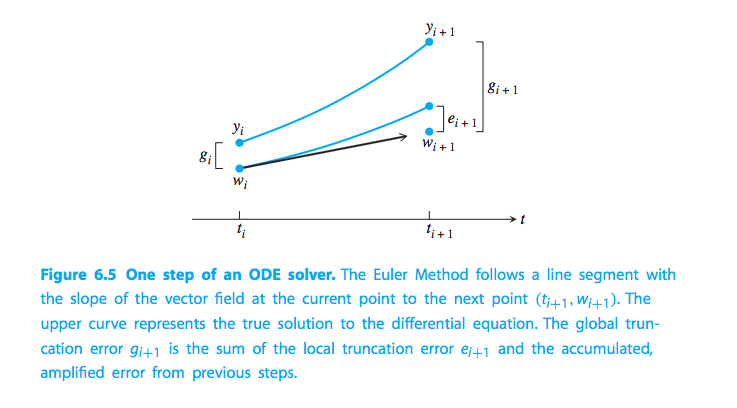

In [16]:
Image(filename='Images/08_1.png')

### <span style="color:#19bfc2">EXAMPLE 6.7</span>

<span style="font-size:large;">Find the local truncation error for Euler’s Method.

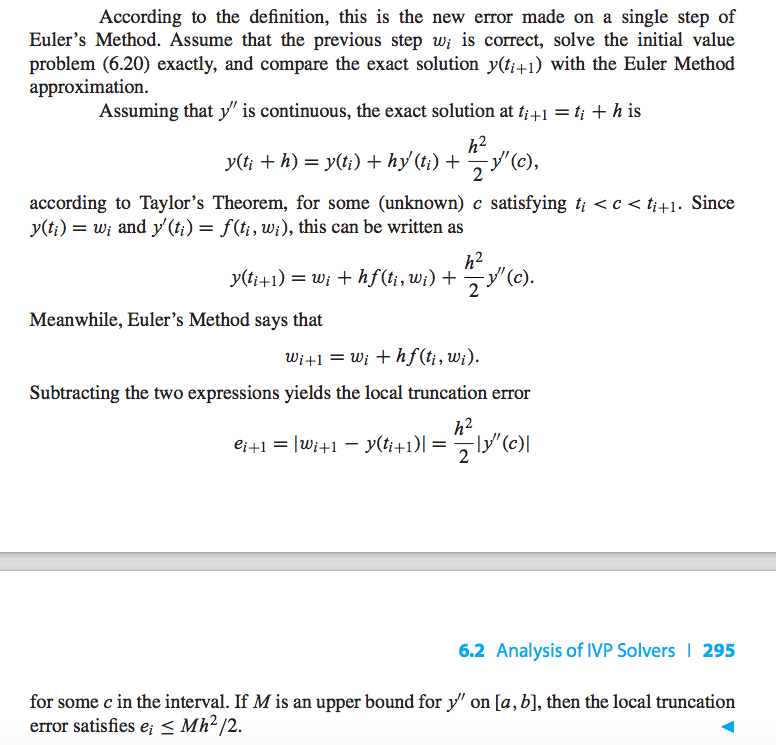

In [17]:
Image(filename='Images/08_2.png')

<span style="font-size:large;">**Theorem**. Assume that $f(t,y)$ has a Lipschitz constant $L$ for the variable $y$ and that the value $y_i$ of the solution of the initial value problem at $t_i$ 
<p/>
<span style="font-size:large;">
\begin{align}
&y' = f(t,y), {\mbox{ for }} t \in [a,b],\\
&y(a) = y_a,
\end{align}

<span style="font-size:large;">is approximated by $w_i$ from a one-step ODE solver with local truncation error $e_i ≤ Ch^{k+1}$, for some constant $C$ and $k ≥ 0$. Then, for each $a < t_i < b$, the solver has global truncation error
<p/>
<span style="font-size:large;">
$$g_i = |w_i − y_i| ≤ \frac{Ch^k}{L} (e^{L(t_i − a)} − 1).$$
<p/>
    
<span style="font-size:large;">**Corrolary** (**Euler’s Method convergence**). Assume that $f(t,y)$ has a Lipschitz constant $L$ for the variable $y$ and that the solution $y_i$ of the initial value problem above at $t_i$ is approximated by $w_i$, using Euler’s Method. Let $M$ be an upper bound for $|y''(t)|$ on $[a,b]$. Then
<p/>
<span style="font-size:large;">
$$|w_i − y_i| ≤ \frac{Mh}{2L} (e^{L(t_i−a)} − 1).$$

### <span style="color:#19bfc2">EXAMPLE 6.8</span>

<span style="font-size:large;">Find an error bound for Euler’s Method applied to Example 6.1.

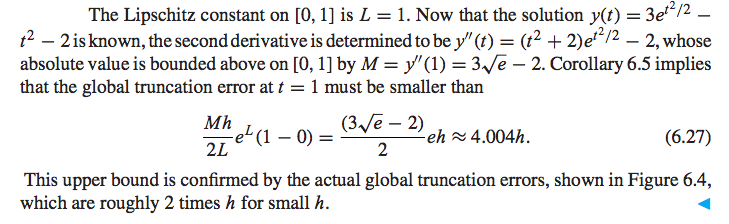

In [18]:
Image(filename='Images/08_3.png')

### <span style="color:#19bfc2">EXAMPLE 6.9</span>

<span style="font-size:large;">Apply Euler’s Method to the initial value problem
<p/>
<span style="font-size:large;">
\begin{align}
&y' = -4t^3y^2, {\mbox{ for }} t \in [-10,10],\\
&y(-10) = \frac{1}{10001},
\end{align}

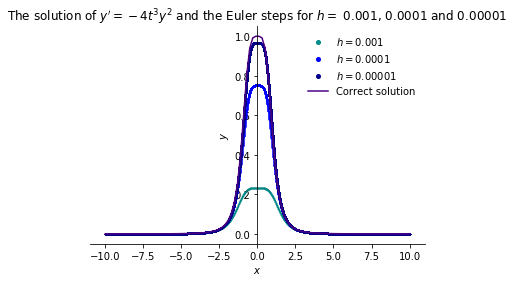

In [19]:
F=lambda y,t:-4*(t**3)*(y**2)
ta=-10
ya=1/10001
tb=10
h1=10**(-3)
h2=10**(-4)
h3=10**(-5)
X1,Y1=Euler(F,ta,ya,tb,h1)
X1,Y1=np.array(X1),np.array(Y1)
X2,Y2=Euler(F,ta,ya,tb,h2)
X2,Y2=np.array(X2),np.array(Y2)
X3,Y3=Euler(F,ta,ya,tb,h3)
X3,Y3=np.array(X3),np.array(Y3)

fig = plt.figure()  
ax = fig.add_subplot(1, 1, 1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position('center')
# ax.spines['bottom'].set_position('center')
lb1="$h = %.3f$" %h1
lb2="$h = %.4f$" %h2
lb3="$h = %.5f$" %h3
p1=plt.plot(X1,Y1,'o',color="darkcyan",markersize=0.1, label=lb1)
p2=plt.plot(X2,Y2,'o',color="blue",markersize=0.1, label=lb2)
p3=plt.plot(X3,Y3,'o',color="darkblue",markersize=0.1, label=lb3)
# plt.quiver(X[:-1], Y[:-1], X[1:]-X[:-1], Y[1:]-Y[:-1], scale_units='xy', angles='xy', scale=1,width=0.003,headwidth=12,color="#19bfc2")

t,y,a,b,ya = sp.symbols("t,y,a,b,y_a")
y=sp.Function("y")
ode=y(t).diff(t) + 4*(t**3)*(y(t)**2)
ode_sol=sp.dsolve(ode)
ics={y(a):ya}
C_eq = sp.Eq(ode_sol.lhs.subs(t, a).subs(ics), ode_sol.rhs.subs(t, a))
C_sol = sp.solve(C_eq)
y=ode_sol.subs(C_sol[0]).subs(ya,1)
ys=y.rhs
ys=sp.lambdify(t,ys,['sympy']) #'numpy')

Xs = np.linspace(min(X1), max(X1), 100)
Ys = [] 
for n in range(0,len(Xs)):
    Ys.append(ys(Xs[n]).subs(a,0).evalf())

p=plt.plot(Xs,Ys,color="indigo",label="Correct solution")
ax.legend(loc='upper right',frameon=False,markerscale=40)
plt.xlabel('$x$') 
plt.ylabel('$y$') 
ti="The solution of $y' = -4 t^3 y^2 $ and the Euler steps for $h =$ %.3f, %.4f and %.5f" %(h1,h2,h3) 
plt.title(ti)
plt.show();

In [20]:
t,y,a,b,ya = sp.symbols("t,y,a,b,y_a")
y=sp.Function("y")
ode=y(t).diff(t)+ 4*(t**3)*(y(t)**2)
ode_sol=sp.dsolve(ode)
ics={y(a):ya}
C_eq = sp.Eq(ode_sol.lhs.subs(t, a).subs(ics), ode_sol.rhs.subs(t, a))
C_sol = sp.solve(C_eq)
y=ode_sol.subs(C_sol[0]).subs(ya,ya)
y.subs(a,-10).subs(ya,1/10001)

Eq(y(t), 1/(t**4 + 1.0))

### 6.2.2 The explicit Trapezoid Method

<span style="font-size:large;"><b>Explicit Trapezoid Method</b>:
    
<span style="font-size:large;">
\begin{align}
w_0 &= y_0\\
w_{i+1} &= w_i + \frac{h}{2}(f(t_i,w_i) + f(t_i + h, w_i + hf(t_i,w_i)))
\end{align}   

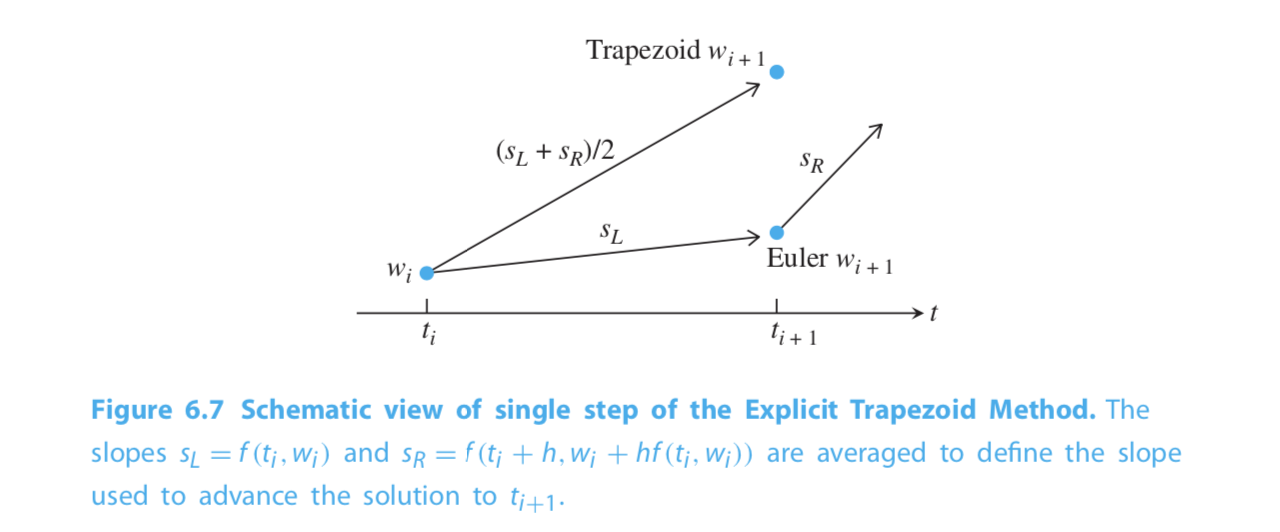

In [21]:
Image(filename='Images/08_4.png')

In [22]:
def Trapezoid(F,ta,ya,tb,h):
    # If [a,b] is the interval where the ode y'=F(t,y) is defined
    # ta=t(a), ya=y(ta) and tb=t(b)
    X = []
    Y = []
    X.append(ta) 
    Y.append(ya) 
    t,y=ta,ya
    while t < tb:
        y = y + h*(F(y,t) + F(y+h*F(y,t),t+h))/2
#         y + h*F(y,t) 
        t=t+h 
        X.append(t) 
        Y.append(y)
    if X[-1] > tb:
        return X[:-1],Y[:-1] 
    else:
        return np.array(X),np.array(Y)

def Trapezoid_df(X,Y):
    # X,Y is the output of the function Trapezoid(F,ta,ya,tb,h)
    ys = odeint(F, ya, X) 
    Z = np.array(ys).flatten()
    ZZ=Z-Y
    df=pd.DataFrame(
    {'$t_i$': X, #xs,
     '$w_i$': Y,  
     '$y_i$': Z,
     '$e_i$': abs(ZZ)
    })
    return df

### <span style="color:#19bfc2">EXAMPLE 6.10</span>

<span style="font-size:large;">Apply the Explicit Trapezoid Method to the initial value Example 6.4 with initial condition $y(0) = 1$.

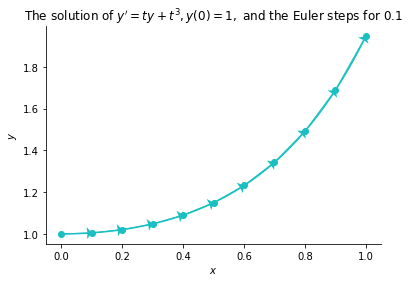

In [23]:
F=lambda y,t:t*y +t**3
ta=0
ya=1
tb=1
h=0.1
X,Y=Trapezoid(F,ta,ya,tb,h)
X,Y=np.array(X),np.array(Y)

fig = plt.figure()  
ax = fig.add_subplot(1, 1, 1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
p=plt.plot(X,Y,'o',color="#19bfc2")
plt.quiver(X[:-1], Y[:-1], X[1:]-X[:-1], Y[1:]-Y[:-1], scale_units='xy', angles='xy', scale=1,width=0.003,headwidth=12,color="#19bfc2")

t,y,a,b,ya = sp.symbols("t,y,a,b,y_a")
y=sp.Function("y")
ode=y(t).diff(t)-t*y(t)-t**3
ode_sol=sp.dsolve(ode)
ics={y(a):ya}
C_eq = sp.Eq(ode_sol.lhs.subs(t, a).subs(ics), ode_sol.rhs.subs(t, a))
C_sol = sp.solve(C_eq)
y=ode_sol.subs(C_sol[0]).subs(ya,1)
ys=y.rhs
ys=sp.lambdify(t,ys,['sympy']) #'numpy')

Xs = np.linspace(min(X), max(X), 100)
Ys = [] 
for n in range(0,len(Xs)):
    Ys.append(ys(Xs[n]).subs(a,0).evalf())

p=plt.plot(Xs,Ys,color="#19bfc2")
plt.xlabel('$x$') 
plt.ylabel('$y$') 
ti="The solution of $y' = ty + t^3, y(0) = 1,$ and the Euler steps for %.1f" %h 
plt.title(ti)
plt.show();

In [24]:
F=lambda y,t:t*y +t**3
ta=0
ya=1
tb=1
h=0.1
X,Y=Trapezoid(F,ta,ya,tb,h)
df=Trapezoid_df(X,Y)
df

,$t_i$,$w_i$,$y_i$,$e_i$
0,0.0,1.000000,1.000000,0.000000
1,0.1,1.005050,1.005038,0.000012
2,0.2,1.020677,1.020604,0.000073
3,0.3,1.048262,1.048084,0.000179
4,0.4,1.090185,1.089861,0.000323
5,0.5,1.149943,1.149446,0.000497
6,0.6,1.232340,1.231652,0.000688
7,0.7,1.343736,1.342864,0.000872
8,0.8,1.492400,1.491384,0.001017
9,0.9,1.688981,1.687908,0.001073


### <span style="color:#19bfc2">EXAMPLE 6.11</span>

<span style="font-size:large;">Apply the Trapezoid Method to Example 6.9:
<p/>
<span style="font-size:large;">
\begin{align}
&y' = -4t^3y^2, {\mbox{ for }} t \in [-10,10],\\
&y(-10) = \frac{1}{10001},
\end{align}    

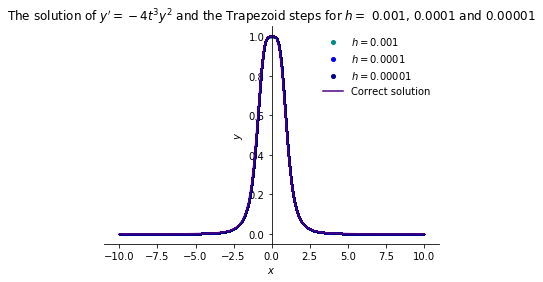

In [25]:
F=lambda y,t:-4*(t**3)*(y**2)
ta=-10
ya=1/10001
tb=10
h1=10**(-3)
h2=10**(-4)
h3=10**(-5)
X1,Y1=Trapezoid(F,ta,ya,tb,h1)
X1,Y1=np.array(X1),np.array(Y1)
X2,Y2=Trapezoid(F,ta,ya,tb,h2)
X2,Y2=np.array(X2),np.array(Y2)
X3,Y3=Trapezoid(F,ta,ya,tb,h3)
X3,Y3=np.array(X3),np.array(Y3)

fig = plt.figure()  
ax = fig.add_subplot(1, 1, 1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position('center')
# ax.spines['bottom'].set_position('center')
lb1="$h = %.3f$" %h1
lb2="$h = %.4f$" %h2
lb3="$h = %.5f$" %h3
p1=plt.plot(X1,Y1,'o',color="darkcyan",markersize=0.1, label=lb1)
p2=plt.plot(X2,Y2,'o',color="blue",markersize=0.1, label=lb2)
p3=plt.plot(X3,Y3,'o',color="darkblue",markersize=0.1, label=lb3)
# plt.quiver(X[:-1], Y[:-1], X[1:]-X[:-1], Y[1:]-Y[:-1], scale_units='xy', angles='xy', scale=1,width=0.003,headwidth=12,color="#19bfc2")

t,y,a,b,ya = sp.symbols("t,y,a,b,y_a")
y=sp.Function("y")
ode=y(t).diff(t) + 4*(t**3)*(y(t)**2)
ode_sol=sp.dsolve(ode)
ics={y(a):ya}
C_eq = sp.Eq(ode_sol.lhs.subs(t, a).subs(ics), ode_sol.rhs.subs(t, a))
C_sol = sp.solve(C_eq)
y=ode_sol.subs(C_sol[0]).subs(ya,1)
ys=y.rhs
ys=sp.lambdify(t,ys,['sympy']) #'numpy')

Xs = np.linspace(min(X1), max(X1), 100)
Ys = [] 
for n in range(0,len(Xs)):
    Ys.append(ys(Xs[n]).subs(a,0).evalf())

p=plt.plot(Xs,Ys,color="indigo",label="Correct solution")
ax.legend(loc='upper right',frameon=False,markerscale=40)
plt.xlabel('$x$') 
plt.ylabel('$y$') 
ti="The solution of $y' = -4 t^3 y^2 $ and the Trapezoid steps for $h =$ %.3f, %.4f and %.5f" %(h1,h2,h3) 
plt.title(ti)
plt.show();

In [26]:
t,y,a,b,ya = sp.symbols("t,y,a,b,y_a")
y=sp.Function("y")
ode=y(t).diff(t)+ 4*(t**3)*(y(t)**2)
ode_sol=sp.dsolve(ode)
ics={y(a):ya}
C_eq = sp.Eq(ode_sol.lhs.subs(t, a).subs(ics), ode_sol.rhs.subs(t, a))
C_sol = sp.solve(C_eq)
y=ode_sol.subs(C_sol[0]).subs(ya,ya)
y.subs(a,-10).subs(ya,1/10001)

Eq(y(t), 1/(t**4 + 1.0))

### 6.2.3 Taylor Methods

<span style="font-size:large;"><b>Taylor Method of order $k$</b>:
    
<span style="font-size:large;">
\begin{align}
w_0 &= y_0\\
w_{i+1} &= w_i + hf(t_i,w_i) + \frac{h^2}{2}f'(t_i,w_i) + \ldots + \frac{h^k}{k!}f^{(k-1)}(t_i,w_i)
\end{align}   

<span style="font-size:large;"><b>Second-Order Taylor Method</b>:
    
<span style="font-size:large;">
\begin{align}
w_0 &= y_0\\
w_{i+1} &= w_i + hf(t_i,w_i) + \frac{h^2}{2}(f_t(t_i,w_i) + f_y(t_i,w_i) f(t_i,w_i))
\end{align} 

In [27]:
def Taylor2(F,Fpt,Fpy,ta,ya,tb,h):
    # If [a,b] is the interval where the ode y'=F(t,y) is defined
    # ta=t(a), ya=y(ta) and tb=t(b)
    X = []
    Y = []
    X.append(ta) 
    Y.append(ya) 
    t,y=ta,ya
    while t < tb:
        y = y + h*F(y,t) + (h**2)*(Fpt(y,t) + Fpy(y,t)*F(y,t))/2
        t=t+h 
        X.append(t) 
        Y.append(y)
    if X[-1] > tb:
        return X[:-1],Y[:-1] 
    else:
        return np.array(X),np.array(Y)

def Taylor2_df(X,Y):
    # X,Y is the output of the function Taylor2(F,Fpt,Fpy,ta,ya,tb,h)
    ys = odeint(F, ya, X) 
    Z = np.array(ys).flatten()
    ZZ=Z-Y
    df=pd.DataFrame(
    {'$t_i$': X, #xs,
     '$w_i$': Y,  
     '$y_i$': Z,
     '$e_i$': abs(ZZ)
    })
    return df

### <span style="color:#19bfc2">EXAMPLE 6.12</span>

<span style="font-size:large;">Apply the second-order Taylor Method for the IVP of Example 6.1:
<p/>
    
<span style="font-size:large;">
\begin{align}
&y' = ty + y^3, {\mbox{ for }} t \in [0,1],\\
&y(a) = 1.
\end{align}

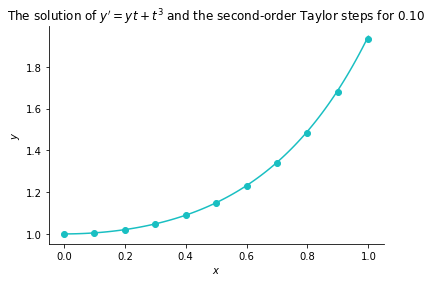

In [28]:
F=lambda y,t:y*t+t**3
Fpt=lambda y,t:y+3*t**2
Fpy=lambda y,t:t
ta=0
ya=1
tb=1
h=0.1
X,Y=Taylor2(F,Fpt,Fpy,ta,ya,tb,h)
X,Y=np.array(X),np.array(Y)

fig = plt.figure()  
ax = fig.add_subplot(1, 1, 1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
p=plt.plot(X,Y,'o',color="#19bfc2")
# plt.quiver(X[:-1], Y[:-1], X[1:]-X[:-1], Y[1:]-Y[:-1], scale_units='xy', angles='xy', scale=1,width=0.003,headwidth=12,color="#19bfc2")

t,y,a,b,ya = sp.symbols("t,y,a,b,y_a")
y=sp.Function("y")
ode=y(t).diff(t)-t*y(t)-t**3
ode_sol=sp.dsolve(ode)
ics={y(a):ya}
C_eq = sp.Eq(ode_sol.lhs.subs(t, a).subs(ics), ode_sol.rhs.subs(t, a))
C_sol = sp.solve(C_eq)
y=ode_sol.subs(C_sol[0]).subs(ya,1)
ys=y.rhs
ys=sp.lambdify(t,ys,['sympy']) #'numpy')

Xs = np.linspace(min(X), max(X), 100)
Ys = [] 
for n in range(0,len(Xs)):
    Ys.append(ys(Xs[n]).subs(a,0).evalf())

p=plt.plot(Xs,Ys,color="#19bfc2")
plt.xlabel('$x$') 
plt.ylabel('$y$') 
ti="The solution of $y' = yt + t^3$ and the second-order Taylor steps for %.2f" %h 
plt.title(ti)
plt.show();

In [29]:
F=lambda y,t:y*t+t**3
Fpt=lambda y,t:y+3*t**2
Fpy=lambda y,t:t
ta=0
ya=1
tb=1
h=0.1
X,Y=Taylor2(F,Fpt,Fpy,ta,ya,tb,h)
df=Taylor2_df(X,Y)
df

,$t_i$,$w_i$,$y_i$,$e_i$
0,0.0,1.000000,1.000000,0.000000
1,0.1,1.005000,1.005038,0.000038
2,0.2,1.020376,1.020604,0.000228
3,0.3,1.047497,1.048084,0.000586
4,0.4,1.088721,1.089861,0.001140
5,0.5,1.147513,1.149446,0.001933
6,0.6,1.228623,1.231652,0.003029
7,0.7,1.338343,1.342864,0.004521
8,0.8,1.484848,1.491384,0.006535
9,0.9,1.678660,1.687908,0.009248


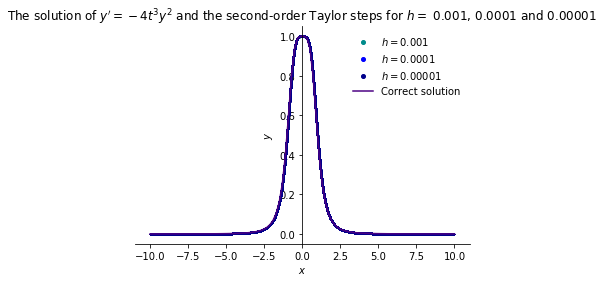

In [30]:
F=lambda y,t:-4*(t**3)*(y**2)
Fpt=lambda y,t:-12*(t**2)*(y**2)
Fpy=lambda y,t:-8*(t**3)*y
ta=-10
ya=1/10001
tb=10
h1=10**(-3)
h2=10**(-4)
h3=10**(-5)
X1,Y1=Taylor2(F,Fpt,Fpy,ta,ya,tb,h1)
X1,Y1=np.array(X1),np.array(Y1)
X2,Y2=Taylor2(F,Fpt,Fpy,ta,ya,tb,h2)
X2,Y2=np.array(X2),np.array(Y2)
X3,Y3=Taylor2(F,Fpt,Fpy,ta,ya,tb,h3)
X3,Y3=np.array(X3),np.array(Y3)

fig = plt.figure()  
ax = fig.add_subplot(1, 1, 1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position('center')
# ax.spines['bottom'].set_position('center')
lb1="$h = %.3f$" %h1
lb2="$h = %.4f$" %h2
lb3="$h = %.5f$" %h3
p1=plt.plot(X1,Y1,'o',color="darkcyan",markersize=0.1, label=lb1)
p2=plt.plot(X2,Y2,'o',color="blue",markersize=0.1, label=lb2)
p3=plt.plot(X3,Y3,'o',color="darkblue",markersize=0.1, label=lb3)
# plt.quiver(X[:-1], Y[:-1], X[1:]-X[:-1], Y[1:]-Y[:-1], scale_units='xy', angles='xy', scale=1,width=0.003,headwidth=12,color="#19bfc2")

t,y,a,b,ya = sp.symbols("t,y,a,b,y_a")
y=sp.Function("y")
ode=y(t).diff(t) + 4*(t**3)*(y(t)**2)
ode_sol=sp.dsolve(ode)
ics={y(a):ya}
C_eq = sp.Eq(ode_sol.lhs.subs(t, a).subs(ics), ode_sol.rhs.subs(t, a))
C_sol = sp.solve(C_eq)
y=ode_sol.subs(C_sol[0]).subs(ya,1)
ys=y.rhs
ys=sp.lambdify(t,ys,['sympy']) #'numpy')

Xs = np.linspace(min(X1), max(X1), 100)
Ys = [] 
for n in range(0,len(Xs)):
    Ys.append(ys(Xs[n]).subs(a,0).evalf())

p=plt.plot(Xs,Ys,color="indigo",label="Correct solution")
ax.legend(loc='upper right',frameon=False,markerscale=40)
plt.xlabel('$x$') 
plt.ylabel('$y$') 
ti="The solution of $y' = -4 t^3 y^2 $ and the second-order Taylor steps for $h =$ %.3f, %.4f and %.5f" %(h1,h2,h3) 
plt.title(ti)
plt.show();

In [31]:
F=lambda y,t:-4*(t**3)*(y**2)
ta=-1
ya=1
tb=1
h=0.1
X,Y=Euler(F,ta,ya,tb,h)
df1=Euler_df(X,Y)
# df1
df1["$e_i$-Euler"] = df1['$e_i$']
df1 = df1[['$t_i$', '$e_i$-Euler']]
F=lambda y,t:-4*(t**3)*(y**2)
ta=-1
ya=1
tb=1
h=0.1
X,Y=Trapezoid(F,ta,ya,tb,h)
df2=Trapezoid_df(X,Y)
df2["$e_i$-Trapazoid"] = df2['$e_i$']
df2 = df2[['$t_i$', "$e_i$-Trapazoid"]]
F=lambda y,t:-4*(t**3)*(y**2)
Fpt=lambda y,t:-12*(t**2)*(y**2)
Fpy=lambda y,t:-8*(t**3)*y
ta=-1
ya=1
tb=1
h=0.1
X,Y=Taylor2(F,Fpt,Fpy,ta,ya,tb,h)
df3=Taylor2_df(X,Y)
df3["$e_i$-Taylor2"] = df3['$e_i$']
df3 = df3[['$t_i$', "$e_i$-Taylor2"]]
combined = df1.merge(df2, on='$t_i$', how="inner").merge(df3, on='$t_i$', how="inner")
combined.head(20)

,$t_i$,$e_i$-Euler,$e_i$-Trapazoid,$e_i$-Taylor2
0,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,-9.000000e-01,1.241581e-01,3.839005e-02,2.415805e-02
2,-8.000000e-01,4.698708e-01,1.694339e-01,1.076786e-01
3,-7.000000e-01,1.397349e+00,6.040883e-01,3.918404e-01
4,-6.000000e-01,3.897586e+00,2.071679e+00,1.397183e+00
5,-5.000000e-01,1.092179e+01,7.216607e+00,5.210397e+00
6,-4.000000e-01,3.269502e+01,2.630523e+01,2.105827e+01
7,-3.000000e-01,1.160531e+02,1.070714e+02,9.644294e+01
8,-2.000000e-01,6.170535e+02,6.066187e+02,5.917945e+02
9,-1.000000e-01,1.000501e+04,9.994157e+03,9.978692e+03


## 6.3 Systems of Ordinary Differential Equations

### <span style="color:#19bfc2">EXAMPLE 6.13</span>

<span style="font-size:large;">Solve the first-order system of two equations:
<p/>
    
<span style="font-size:large;">
\begin{align}
y_1' &= y_2^2 - 2y_1\\
y_2' &= y_1 - y_2 - ty_2^2\\
y_1(0) &= 0\\
y_2(0) &= 1    
\end{align}

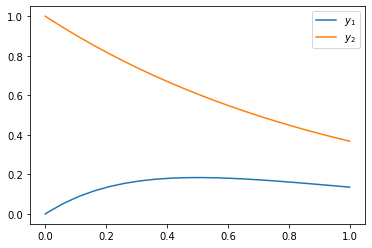

In [32]:
def rhs(t, y): 
    return [y[1]**2-2*y[0],y[0]-y[1]-t*y[1]**2]
sol = solve_ivp(rhs, (0, 1),[0,1],max_step=0.05)
sol0=[p[0] for p in list(sol.y.T)]
sol1=[p[1] for p in list(sol.y.T)]
# plt.plot(sol.t, sol.y.T);
plt.plot(sol.t, sol0,label='$y_1$');
plt.plot(sol.t, sol1,label='$y_2$');
# f1=lambda t:t*(np.exp(-2*t))
# Y1=[f1(x) for x in sol.t]
# f2=lambda t:np.exp(-t)
# Y2=[f2(x) for x in sol.t]
# plt.plot(sol.t,Y1,label='$t e^{-2 t}$')
# plt.plot(sol.t,Y2,label='$e^{-t}$')
plt.legend();

### 6.3.1 Higher order equations

### <span style="color:#19bfc2">EXAMPLE 6.14</span>

<span style="font-size:large;">Solve the third-order differential equation:
<p/>
    
<span style="font-size:large;">
\begin{align}
y''' &= 0.01 y''^2 - y' + yy'' + \sin t\\
y(0) &= 0\\
y'(0) &= 1 \\
y''(0) &= 2
\end{align}    

Setting $y_1 = y$, define the new variables 
$$y_2 = y'$$
$$y_3 = y''$$ 
thus, obtaining the first-order system 
$$y_1' = y_2$$
$$y_2' = y_3$$
$$y_3' = 0.01 y_3^2 - y_2 + y_1y_3 + \sin t$$

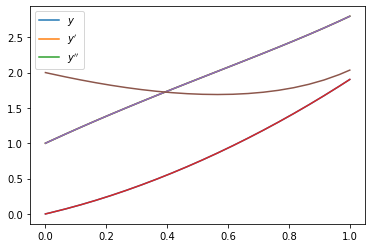

In [33]:
def rhs(t, y): 
    return [y[1],y[2],0.01*y[2]**2-y[1]+y[0]*y[2]+np.sin(t)]
sol = solve_ivp(rhs, (0, 1),[0,1,2],max_step=0.05)
sol0=[p[0] for p in list(sol.y.T)]
sol1=[p[1] for p in list(sol.y.T)]
sol2=[p[2] for p in list(sol.y.T)]
plt.plot(sol.t, sol0,label='$y$');
plt.plot(sol.t, sol1,label="$y'$");
plt.plot(sol.t, sol1,label="$y''$");
plt.plot(sol.t, sol.y.T);
plt.legend();

### 6.3.2 Computer simulation: The pendulum

### The penulum equation ($y'' + g \sin y = 0$)

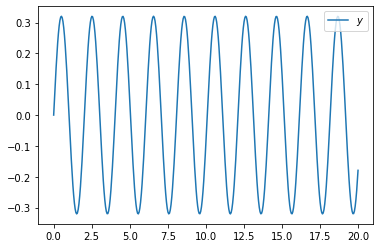

In [34]:
g=9.81
def rhs(t, y): 
    return [y[1],-g*np.sin(y[0])]
sol1 = solve_ivp(rhs, (0, 20),[0,1],max_step=0.05) 
sol10=[p[0] for p in list(sol1.y.T)]
plt.plot(sol1.t, sol10,label='$y$');
plt.legend(loc=1);

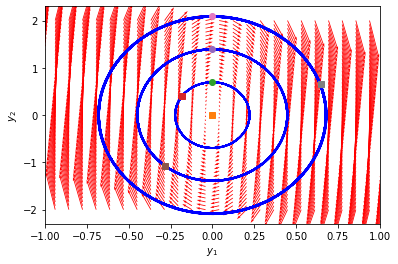

In [35]:
g=9.81
def f(Y,t): 
    y1,y2=Y
    return [y2,-g*np.sin(y1)]
y1 = np.linspace(-2.0, 2.0, 50) #20)
y2 = np.linspace(-2.0, 2.0, 50) #20)
Y1, Y2 = np.meshgrid(y1, y2)
t = 0
u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)
NI, NJ = Y1.shape
for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
   
Q = plt.quiver(Y1, Y2, u, v, color='r',scale =70) #50

for y20 in [0,0.7,1.4,2.1]: #,2.8,3.5]: #[0, 0.5, 1, 1.5, 2, 2.5]:
    tspan = np.linspace(0, 50, 500) #200)
    y0 = [0.0, y20]
    ys = odeint(f, y0, tspan)
    plt.plot(ys[:,0], ys[:,1], 'b-') # path
    plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
    plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end

plt.xlabel('$y_1$');
plt.ylabel('$y_2$');
plt.xlim([-1,1]); #[-2, 8]);
plt.ylim([-2.3,2.3]); #[-4, 4]);

### <span style="color:#19bfc2">EXAMPLE 6.15</span> 

<span style="font-size:large;"> Solve the damped pendulum equation:
<p/>
    
<span style="font-size:large;">
\begin{align}
y'' + d y' + g \sin y = 0,
\end{align} 
    
<span style="font-size:large;"> where $g = 9.81$ and $d > 0$ is the damping coefficient.

Setting 
\begin{align}
y_1 &= y\\
y_2 &= y'
\end{align}
we get the first-order system 
\begin{align}
y_1' &= y_2\\
y_2' &= -g \sin y_1 - d y_2
\end{align}

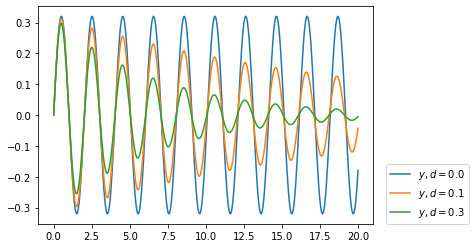

In [36]:
g=9.81
d=0.
def rhs(t, y): 
    return [y[1],-g*np.sin(y[0])]
sol0 = solve_ivp(rhs, (0, 20),[0,1],max_step=0.05) 
sol00=[p[0] for p in list(sol0.y.T)]
plt.plot(sol1.t, sol00,label='$y, d = %.1f$' %d);
d=0.1
def rhs(t, y): 
    return [y[1],-g*np.sin(y[0])-0.1*y[1]]
sol1 = solve_ivp(rhs, (0, 20),[0,1],max_step=0.05) 
sol10=[p[0] for p in list(sol1.y.T)]
plt.plot(sol1.t, sol10,label='$y, d = %.1f$' %d);
d=0.3
def rhs(t, y): 
    return [y[1],-g*np.sin(y[0])-0.3*y[1]]
sol1 = solve_ivp(rhs, (0, 20),[0,1],max_step=0.05) 
sol10=[p[0] for p in list(sol1.y.T)]
plt.plot(sol1.t, sol10,label='$y, d = %.1f$' %d);
plt.legend(bbox_to_anchor=(1.3,0.3));

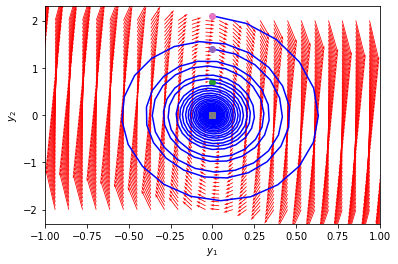

In [37]:
g=9.81
d=0.3
def f(Y,t): 
    y1,y2=Y
    return [y2,-g*np.sin(y1)-d*y2]
y1 = np.linspace(-2.0, 2.0, 50) #20)
y2 = np.linspace(-2.0, 2.0, 50) #20)
Y1, Y2 = np.meshgrid(y1, y2)
t = 0
u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)
NI, NJ = Y1.shape
for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
   
Q = plt.quiver(Y1, Y2, u, v, color='r',scale =70); #50

for y20 in [0,0.7,1.4,2.1]: #,2.8,3.5]: #[0, 0.5, 1, 1.5, 2, 2.5]:
    tspan = np.linspace(0, 50, 500) #200)
    y0 = [0.0, y20]
    ys = odeint(f, y0, tspan)
    plt.plot(ys[:,0], ys[:,1], 'b-'); # path
    plt.plot([ys[0,0]], [ys[0,1]], 'o'); # start
    plt.plot([ys[-1,0]], [ys[-1,1]], 's'); # end

plt.xlabel('$y_1$');
plt.ylabel('$y_2$');
plt.xlim([-1,1]); #[-2, 8]);
plt.ylim([-2.3,2.3]); #[-4, 4]);

### <span style="color:#19bfc2">EXAMPLE 6.16</span>

<span style="font-size:large;"><span style="font-size:large;"> Solve the forced damped pendulum equation:
<p/>
    
<span style="font-size:large;">
\begin{align}
y'' + d y' + g \sin y = A \sin t.
\end{align} 

Setting 
\begin{align}
y_1 &= y\\
y_2 &= y'
\end{align}
we get the first-order system 
\begin{align}
y_1' &= y_2\\
y_2' &= -g \sin y_1 - d y_2 + A \sin t
\end{align}

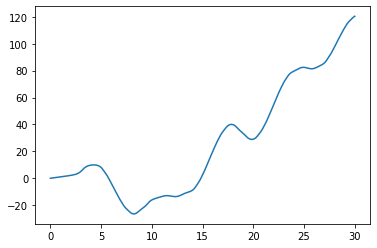

In [38]:
g=9.81
d=0
A=10
def rhs(t, y): 
    return [y[1],-g*np.sin(y[0])-d*y[1]+A*np.sin(t)]
sol1 = solve_ivp(rhs, (0, 30),[0,1],max_step=0.05) 
sol10=[p[0] for p in list(sol1.y.T)]
plt.plot(sol1.t, sol10,label='$y, d = %.1f, A = %i$' %(d,A));

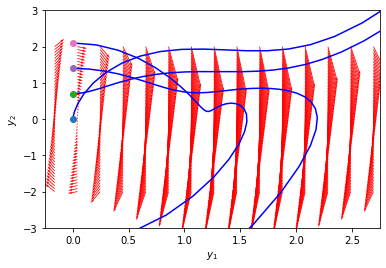

In [39]:
g=9.81
d=0
A=10
def f(Y,t): 
    y1,y2=Y
    return [y2,-g*np.sin(y1)-d*y2+A*np.sin(t)]
y1 = np.linspace(-2.0, 8.0, 50) #20)
y2 = np.linspace(-2.0, 2.0, 50) #20)
Y1, Y2 = np.meshgrid(y1, y2)
t = 0
u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)
NI, NJ = Y1.shape
for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
   
Q = plt.quiver(Y1, Y2, u, v, color='r',scale =70); #50

for y20 in [0,0.7,1.4,2.1]: #,2.8,3.5]: #[0, 0.5, 1, 1.5, 2, 2.5]:
    tspan = np.linspace(0, 50, 500) #200)
    y0 = [0.0, y20]
    ys = odeint(f, y0, tspan)
    plt.plot(ys[:,0], ys[:,1], 'b-'); # path
    plt.plot([ys[0,0]], [ys[0,1]], 'o'); # start
    plt.plot([ys[-1,0]], [ys[-1,1]], 's'); # end

plt.xlabel('$y_1$');
plt.ylabel('$y_2$');
plt.xlim([-0.25,2.75]); #[-1,1]); #[-2, 8]);
plt.ylim([-3,3]); #[-4, 4]);

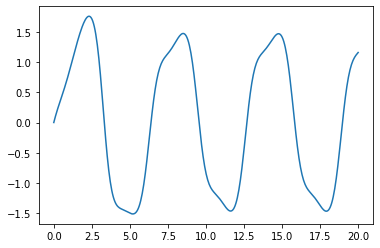

In [40]:
g=9.81
d=1
A=10
def rhs(t, y): 
    return [y[1],-g*np.sin(y[0])-d*y[1]+A*np.sin(t)]
sol1 = solve_ivp(rhs, (0, 20),[0,1],max_step=0.05) 
sol10=[p[0] for p in list(sol1.y.T)]
plt.plot(sol1.t, sol10,label='$y, d = %.1f, A = %i$' %(d,A));

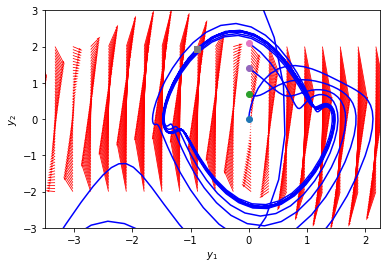

In [41]:
g=9.81
d=1
A=10
def f(Y,t): 
    y1,y2=Y
    return [y2,-g*np.sin(y1)-d*y2+A*np.sin(t)]
y1 = np.linspace(-7.0, 8.0, 50) #20)
y2 = np.linspace(-2.0, 2.0, 50) #20)
Y1, Y2 = np.meshgrid(y1, y2)
t = 0
u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)
NI, NJ = Y1.shape
for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
   
Q = plt.quiver(Y1, Y2, u, v, color='r',scale =70); #50

for y20 in [0,0.7,1.4,2.1]: #,2.8,3.5]: #[0, 0.5, 1, 1.5, 2, 2.5]:
    tspan = np.linspace(0, 50, 500) #200)
    y0 = [0.0, y20]
    ys = odeint(f, y0, tspan)
    plt.plot(ys[:,0], ys[:,1], 'b-'); # path
    plt.plot([ys[0,0]], [ys[0,1]], 'o'); # start
    plt.plot([ys[-1,0]], [ys[-1,1]], 's'); # end

plt.xlabel('$y_1$');
plt.ylabel('$y_2$');
plt.xlim([-3.5,2.25]); #[-1,1]); #[-2, 8]);
plt.ylim([-3,3]); #[-4, 4]);

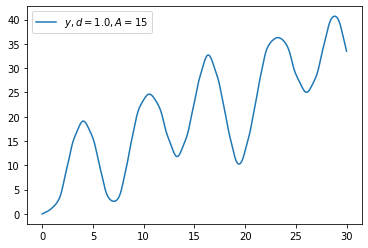

In [42]:
g=9.81
d=1
A=15
def rhs(t, y): 
    return [y[1],-g*np.sin(y[0])-d*y[1]+A*np.sin(t)]
sol1 = solve_ivp(rhs, (0, 30),[0,1],max_step=0.05) 
sol10=[p[0] for p in list(sol1.y.T)]
plt.plot(sol1.t, sol10,label='$y, d = %.1f, A = %i$' %(d,A));
plt.legend();

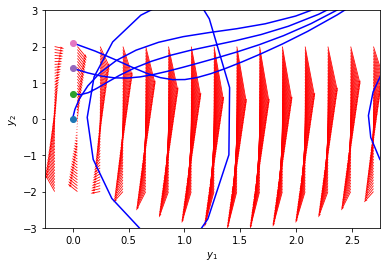

In [43]:
g=9.81
d=1
A=15
def f(Y,t): 
    y1,y2=Y
    return [y2,-g*np.sin(y1)-d*y2+A*np.sin(t)]
y1 = np.linspace(-2.0, 8.0, 50) #20)
y2 = np.linspace(-2.0, 2.0, 50) #20)
Y1, Y2 = np.meshgrid(y1, y2)
t = 0
u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)
NI, NJ = Y1.shape
for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
   
Q = plt.quiver(Y1, Y2, u, v, color='r',scale =70); #50

for y20 in [0,0.7,1.4,2.1]: #,2.8,3.5]: #[0, 0.5, 1, 1.5, 2, 2.5]:
    tspan = np.linspace(0, 50, 500) #200)
    y0 = [0.0, y20]
    ys = odeint(f, y0, tspan)
    plt.plot(ys[:,0], ys[:,1], 'b-'); # path
    plt.plot([ys[0,0]], [ys[0,1]], 'o'); # start
    plt.plot([ys[-1,0]], [ys[-1,1]], 's'); # end

plt.xlabel('$y_1$');
plt.ylabel('$y_2$');
plt.xlim([-0.25,2.75]); #[-1,1]); #[-2, 8]);
plt.ylim([-3,3]); #[-4, 4]);

### <span style="color:#19bfc2">EXAMPLE 6.17</span>

<span style="font-size:large;"><span style="font-size:large;"> Solve the double pendulum system of equations:
<p/>
    
<span style="font-size:large;">
\begin{align}
g (m_1+m_2) \sin (\theta_1) + l_1 (m_1+m_2) \frac{d^2\theta_1}{dt^2} + 
    l_2 m_2 \sin (\theta_1-\theta_2) \big(\frac{d\theta_2}{dt}\big)^2 
    + l_2 m_2 \frac{d^2\theta_2}{dt^2} &= d \theta_1\\
g m_2 \sin (\theta_2) - l_1 m_2 \sin (\theta_1-\theta_2) \big(\frac{d\theta_1}{dt}\big)^2 +
    l_1 m_2 \cos (\theta_1-\theta_2) \frac{d^2\theta_1}{dt^2} +
    l_2 m_2 \frac{d^2\theta_2}{dt^2} &= 0.
\end{align}

#### Without friction ($d=0$)

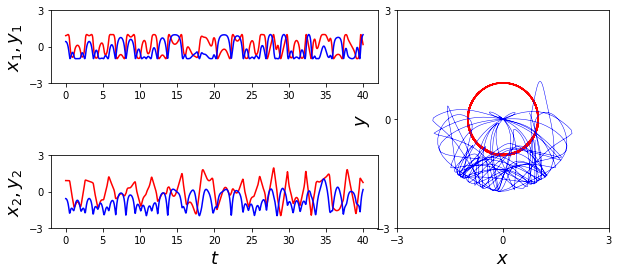

In [44]:
t,g, m1, l1, m2, l2,d=sp.symbols("t,g, m_1, l_1, m_2, l_2,d")
theta1, theta2 = sp.symbols("theta_1, theta_2", cls=sp.Function)
ode1 = sp.Eq((m1+m2)*l1*theta1(t).diff(t,t)+m2*l2*theta2(t).diff(t,t)+m2*l2*theta2(t).diff(t)**2*sp.sin(theta1(t)-theta2(t))+g*(m1+m2)*sp.sin(theta1(t))-d*theta1(t))
ode2 = sp.Eq(m2*l2*theta2(t).diff(t,t)+m2*l1*theta1(t).diff(t,t) * sp.cos(theta1(t)-theta2(t))-m2*l1 *theta1(t).diff(t)**2 * sp.sin(theta1(t) - theta2(t))+m2*g*sp.sin(theta2(t)))
y1, y2, y3, y4 = sp.symbols("y_1, y_2, y_3, y_4", cls=sp.Function)
varchange = {theta1(t).diff(t, t): y2(t).diff(t),theta1(t): y1(t),theta2(t).diff(t, t): y4(t).diff(t),theta2(t): y3(t)}
ode1_vc = ode1.subs(varchange)
ode2_vc = ode2.subs(varchange)
ode3 = y1(t).diff(t) - y2(t)
ode4 = y3(t).diff(t) - y4(t)
y = sp.Matrix([y1(t), y2(t), y3(t), y4(t)])
vcsol = sp.solve((ode1_vc, ode2_vc, ode3, ode4), y.diff(t), dict=True)
f = y.diff(t).subs(vcsol[0])
params = {m1: 1.0, l1: 1.0, m2: 1.0, l2: 1.0, g: 9.81, d:0}
f_np = sp.lambdify((t, y), f.subs(params), 'numpy')
jac = sp.Matrix([[fj.diff(yi) for yi in y] for fj in f])
jac_np = sp.lambdify((t, y), jac.subs(params), 'numpy')
y0 = [2.0, 0, 0, 0]
t = np.linspace(0, 40, 1000) #20
r = scipy.integrate.ode(f_np, jac_np).set_initial_value(y0, t[0]) 
dt = t[1] - t[0]
y = np.zeros((len(t), len(y0)))
idx = 0
while r.successful() and r.t < t[-1]:
    y[idx, :] = r.y
    r.integrate(r.t + dt)
    idx += 1
theta1_np, theta2_np = y[:, 0], y[:, 2]
x1 = params[l1] * np.sin(theta1_np)
y1 = -params[l1] *np.cos(theta1_np)
x2 = x1 + params[l2] * np.sin(theta2_np)
y2 = y1 - params[l2] * np.cos(theta2_np)
fig = plt.figure(figsize=(10, 4));
ax1 = plt.subplot2grid((2, 5), (0, 0), colspan=3);
ax2 = plt.subplot2grid((2, 5), (1, 0), colspan=3);
ax3 = plt.subplot2grid((2, 5), (0, 3), colspan=2, rowspan=2);
ax1.plot(t, x1, 'r');
ax1.plot(t, y1, 'b');
ax1.set_ylabel('$x_1, y_1$', fontsize=18);
ax1.set_yticks([-3, 0, 3]);
ax2.plot(t, x2, 'r');
ax2.plot(t, y2, 'b');
ax2.set_xlabel('$t$', fontsize=18);
ax2.set_ylabel('$x_2, y_2$', fontsize=18);
ax2.set_yticks([-3, 0, 3]);
ax3.plot(x1, y1, 'r');
ax3.plot(x2, y2, 'b', lw=0.5);
ax3.set_xlabel('$x$', fontsize=18);
ax3.set_ylabel('$y$', fontsize=18);
ax3.set_xticks([-3, 0, 3]);
ax3.set_yticks([-3, 0, 3]);
plt.subplots_adjust(hspace=1)

#### With damping ($d > 0$)

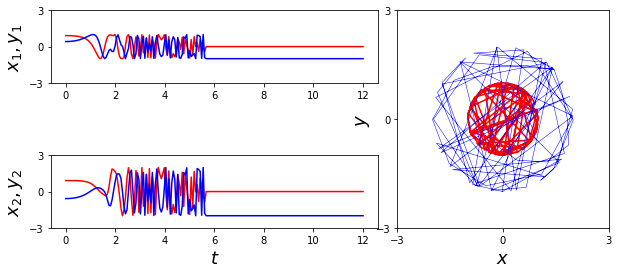

In [45]:
t,g, m1, l1, m2, l2,d=sp.symbols("t,g, m_1, l_1, m_2, l_2,d")
theta1, theta2 = sp.symbols("theta_1, theta_2", cls=sp.Function)
ode1 = sp.Eq((m1+m2)*l1*theta1(t).diff(t,t)+m2*l2*theta2(t).diff(t,t)+m2*l2*theta2(t).diff(t)**2*sp.sin(theta1(t)-theta2(t))+g*(m1+m2)*sp.sin(theta1(t))-d*theta1(t))
ode2 = sp.Eq(m2*l2*theta2(t).diff(t,t)+m2*l1*theta1(t).diff(t,t) * sp.cos(theta1(t)-theta2(t))-m2*l1 *theta1(t).diff(t)**2 * sp.sin(theta1(t) - theta2(t))+m2*g*sp.sin(theta2(t)))
y1, y2, y3, y4 = sp.symbols("y_1, y_2, y_3, y_4", cls=sp.Function)
varchange = {theta1(t).diff(t, t): y2(t).diff(t),theta1(t): y1(t),theta2(t).diff(t, t): y4(t).diff(t),theta2(t): y3(t)}
ode1_vc = ode1.subs(varchange)
ode2_vc = ode2.subs(varchange)
ode3 = y1(t).diff(t) - y2(t)
ode4 = y3(t).diff(t) - y4(t)
y = sp.Matrix([y1(t), y2(t), y3(t), y4(t)])
vcsol = sp.solve((ode1_vc, ode2_vc, ode3, ode4), y.diff(t), dict=True)
f = y.diff(t).subs(vcsol[0])
params = {m1: 1.0, l1: 1.0, m2: 1.0, l2: 1.0, g: 9.81, d:10}
f_np = sp.lambdify((t, y), f.subs(params), 'numpy')
jac = sp.Matrix([[fj.diff(yi) for yi in y] for fj in f])
jac_np = sp.lambdify((t, y), jac.subs(params), 'numpy')
y0 = [2.0, 0, 0, 0]
t = np.linspace(0, 12, 200) #20, 1000)
r = scipy.integrate.ode(f_np, jac_np).set_initial_value(y0, t[0]) 
dt = t[1] - t[0]
y = np.zeros((len(t), len(y0)))
idx = 0
while r.successful() and r.t < t[-1]:
    y[idx, :] = r.y
    r.integrate(r.t + dt)
    idx += 1
theta1_np, theta2_np = y[:, 0], y[:, 2]
x1 = params[l1] * np.sin(theta1_np)
y1 = -params[l1] *np.cos(theta1_np)
x2 = x1 + params[l2] * np.sin(theta2_np)
y2 = y1 - params[l2] * np.cos(theta2_np)
fig = plt.figure(figsize=(10, 4));
ax1 = plt.subplot2grid((2, 5), (0, 0), colspan=3);
ax2 = plt.subplot2grid((2, 5), (1, 0), colspan=3);
ax3 = plt.subplot2grid((2, 5), (0, 3), colspan=2, rowspan=2);
ax1.plot(t, x1, 'r');
ax1.plot(t, y1, 'b');
ax1.set_ylabel('$x_1, y_1$', fontsize=18);
ax1.set_yticks([-3, 0, 3]);
ax2.plot(t, x2, 'r');
ax2.plot(t, y2, 'b');
ax2.set_xlabel('$t$', fontsize=18);
ax2.set_ylabel('$x_2, y_2$', fontsize=18);
ax2.set_yticks([-3, 0, 3]);
ax3.plot(x1, y1, 'r');
ax3.plot(x2, y2, 'b', lw=0.5);
ax3.set_xlabel('$x$', fontsize=18);
ax3.set_ylabel('$y$', fontsize=18);
ax3.set_xticks([-3, 0, 3]);
ax3.set_yticks([-3, 0, 3]);
plt.subplots_adjust(hspace=1)

## 6.4 Runge-Kutta Methods and Applications

### 6.4.1 The Runge-Kutta family

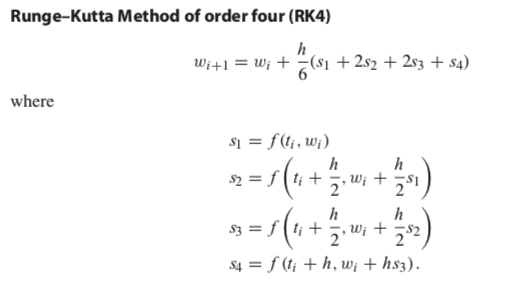

In [46]:
Image(filename='Images/08_6.png', width=600, height=500)

In [47]:
def RK4(F,ta,ya,tb,h):
    # If [a,b] is the interval where the ode y'=F(t,y) is defined
    # ta=t(a), ya=y(ta) and tb=t(b)
    X = []
    Y = []
    X.append(ta) 
    Y.append(ya) 
    t,y=ta,ya
    while t < tb:
        s1 = F(y,t)
        s2 = F(y+h*s1/2,t+h/2)
        s3 = F(y+h*s2/2,t+h/2)
        s4 = F(y+h*s3,t+h/2)
        y = y + h*(s1+2*s2+2*s3+s4)/6
        t = t+h 
        X.append(t) 
        Y.append(y)
    if X[-1] > tb+h:
        return X[:-1],Y[:-1] 
    else:
        return np.array(X),np.array(Y)

def RK4_df(X,Y):
    # X,Y is the output of the function RK4(F,ta,ya,tb,h)
    ys = odeint(F, ya, X) 
    Z = np.array(ys).flatten()
    ZZ=Z-Y
    df=pd.DataFrame(
    {'$t_i$': X, #xs,
     '$w_i$': Y,  
     '$y_i$': Z,
     '$e_i$': abs(ZZ)
    })
    return df

### <span style="color:#19bfc2">EXAMPLE 6.18</span>

<span style="font-size:large;">Apply Runge–Kutta of order four to the IVP of Example 6.1, with initial condition $y_0 = 1$.

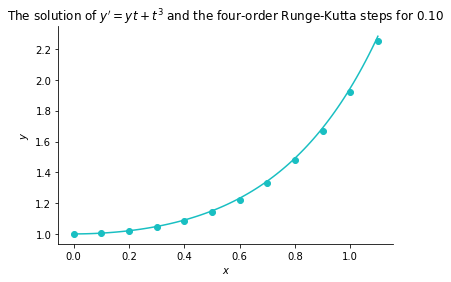

In [48]:
F=lambda y,t:y*t+t**3
ta=0
ya=1
tb=1
h=0.1
X,Y=RK4(F,ta,ya,tb,h)
X,Y=np.array(X),np.array(Y)

fig = plt.figure()  
ax = fig.add_subplot(1, 1, 1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
p=plt.plot(X,Y,'o',color="#19bfc2")
# plt.quiver(X[:-1], Y[:-1], X[1:]-X[:-1], Y[1:]-Y[:-1], scale_units='xy', angles='xy', scale=1,width=0.003,headwidth=12,color="#19bfc2")

t,y,a,b,ya = sp.symbols("t,y,a,b,y_a")
y=sp.Function("y")
ode=y(t).diff(t)-t*y(t)-t**3
ode_sol=sp.dsolve(ode)
ics={y(a):ya}
C_eq = sp.Eq(ode_sol.lhs.subs(t, a).subs(ics), ode_sol.rhs.subs(t, a))
C_sol = sp.solve(C_eq)
y=ode_sol.subs(C_sol[0]).subs(ya,1)
ys=y.rhs
ys=sp.lambdify(t,ys,['sympy']) #'numpy')

Xs = np.linspace(min(X), max(X), 100)
Ys = [] 
for n in range(0,len(Xs)):
    Ys.append(ys(Xs[n]).subs(a,0).evalf())

p=plt.plot(Xs,Ys,color="#19bfc2")
plt.xlabel('$x$') 
plt.ylabel('$y$') 
ti="The solution of $y' = yt + t^3$ and the four-order Runge-Kutta steps for %.2f" %h 
plt.title(ti)
plt.show();

### 6.4.2 Computer simulation: The Hodgkin-Huxley neuron

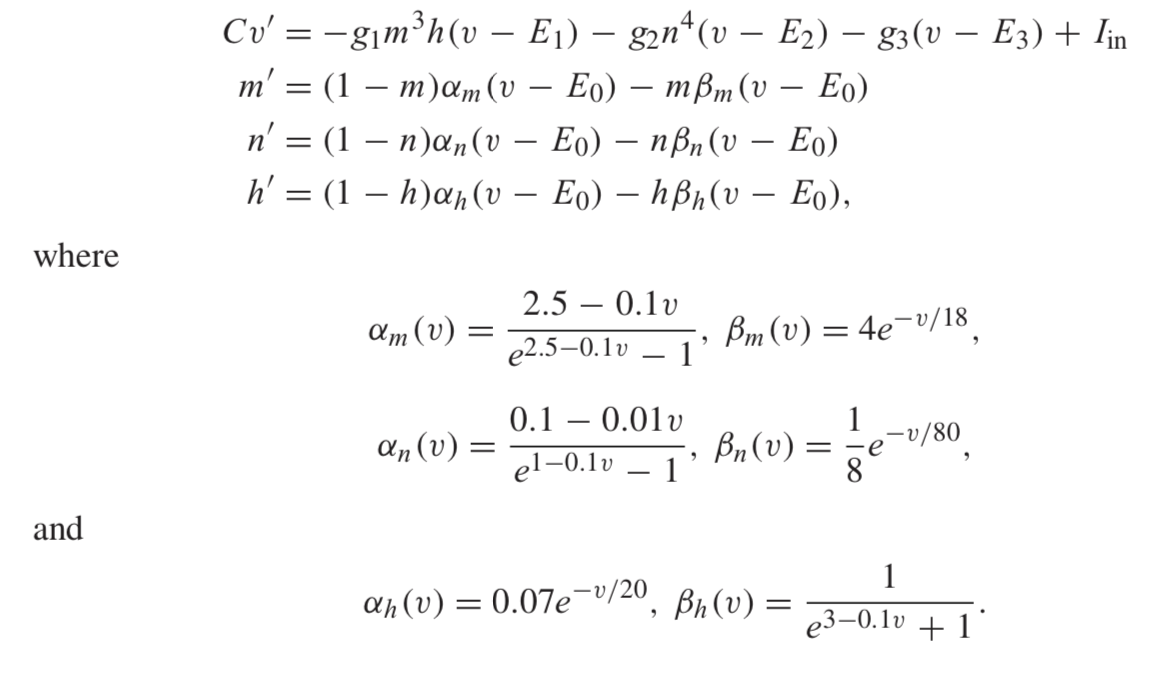

In [49]:
Image(filename='Images/08_5.png', width=600, height=500)

In [50]:
# https://gist.github.com/giuseppebonaccorso/60ce3eb3a829b94abf64ab2b7a56aaef

# Set random seed (for reproducibility)
np.random.seed(1000)

# Start and end time (in milliseconds)
tmin = 0.0
tmax = 50.0

# Average potassium channel conductance per unit area (mS/cm^2)
gK = 36.0

# Average sodoum channel conductance per unit area (mS/cm^2)
gNa = 120.0

# Average leak channel conductance per unit area (mS/cm^2)
gL = 0.3

# Membrane capacitance per unit area (uF/cm^2)
Cm = 1.0

# Potassium potential (mV)
VK = -12.0

# Sodium potential (mV)
VNa = 115.0

# Leak potential (mV)
Vl = 10.613

# Time values
T = np.linspace(tmin, tmax, 10000)

# Potassium ion-channel rate functions

def alpha_n(Vm):
    return (0.01 * (10.0 - Vm)) / (np.exp(1.0 - (0.1 * Vm)) - 1.0)

def beta_n(Vm):
    return 0.125 * np.exp(-Vm / 80.0)

# Sodium ion-channel rate functions

def alpha_m(Vm):
    return (0.1 * (25.0 - Vm)) / (np.exp(2.5 - (0.1 * Vm)) - 1.0)

def beta_m(Vm):
    return 4.0 * np.exp(-Vm / 18.0)

def alpha_h(Vm):
    return 0.07 * np.exp(-Vm / 20.0)

def beta_h(Vm):
    return 1.0 / (np.exp(3.0 - (0.1 * Vm)) + 1.0)
  
# n, m, and h steady-state values

def n_inf(Vm=0.0):
    return alpha_n(Vm) / (alpha_n(Vm) + beta_n(Vm))

def m_inf(Vm=0.0):
    return alpha_m(Vm) / (alpha_m(Vm) + beta_m(Vm))

def h_inf(Vm=0.0):
    return alpha_h(Vm) / (alpha_h(Vm) + beta_h(Vm))
  
# Input stimulus
def Id(t):
    if 0.0 < t < 1.0:
        return 150.0
    elif 10.0 < t < 11.0:
        return 50.0
    return 0.0
  
# Compute derivatives
def compute_derivatives(y, t0):
    dy = np.zeros((4,))
    
    Vm = y[0]
    n = y[1]
    m = y[2]
    h = y[3]
    
    # dVm/dt
    GK = (gK / Cm) * np.power(n, 4.0)
    GNa = (gNa / Cm) * np.power(m, 3.0) * h
    GL = gL / Cm
    
    dy[0] = (Id(t0) / Cm) - (GK * (Vm - VK)) - (GNa * (Vm - VNa)) - (GL * (Vm - Vl))
    
    # dn/dt
    dy[1] = (alpha_n(Vm) * (1.0 - n)) - (beta_n(Vm) * n)
    
    # dm/dt
    dy[2] = (alpha_m(Vm) * (1.0 - m)) - (beta_m(Vm) * m)
    
    # dh/dt
    dy[3] = (alpha_h(Vm) * (1.0 - h)) - (beta_h(Vm) * h)
    
    return dy
  
# State (Vm, n, m, h)
Y = np.array([0.0, n_inf(), m_inf(), h_inf()])

# Solve ODE system
# Vy = (Vm[t0:tmax], n[t0:tmax], m[t0:tmax], h[t0:tmax])
Vy = odeint(compute_derivatives, Y, T)

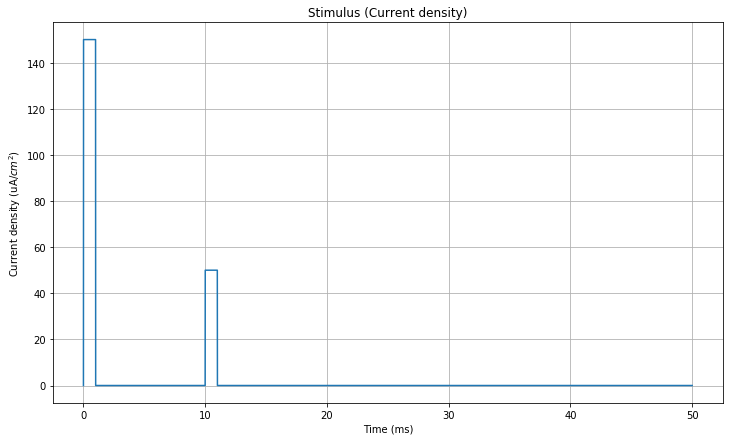

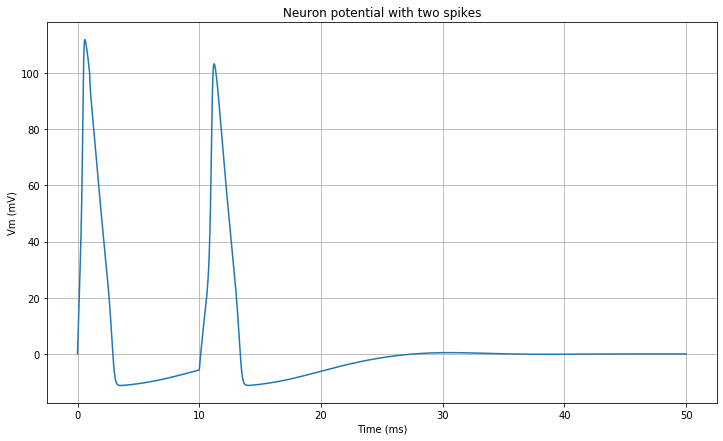

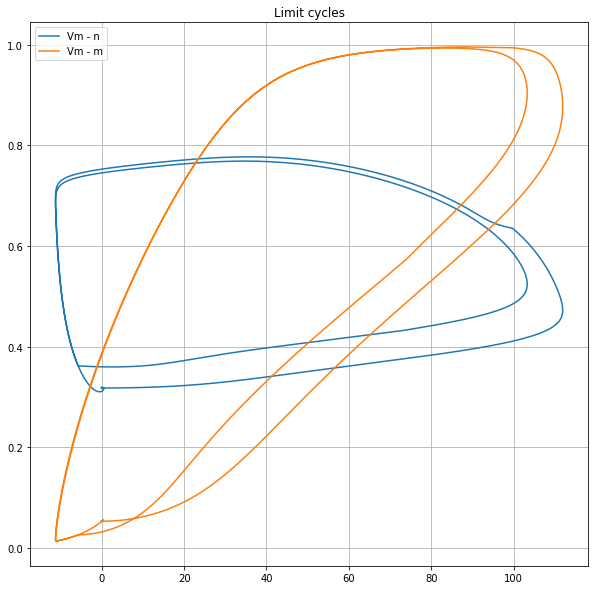

In [51]:
# Input stimulus
Idv = [Id(t) for t in T]

fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(T, Idv)
ax.set_xlabel('Time (ms)')
ax.set_ylabel(r'Current density (uA/$cm^2$)')
ax.set_title('Stimulus (Current density)')
plt.grid()

# Neuron potential
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(T, Vy[:, 0])
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Vm (mV)')
ax.set_title('Neuron potential with two spikes')
plt.grid()

# Trajectories with limit cycles
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(Vy[:, 0], Vy[:, 1], label='Vm - n')
ax.plot(Vy[:, 0], Vy[:, 2], label='Vm - m')
ax.set_title('Limit cycles')
ax.legend()
plt.grid()

### 6.4.3 Computer simulation: The Lorentz equations

<span style="font-size:large;">
\begin{align}
x' &= -sx + sy\\
y' &= -xz + rx - y\\
z' &= xy - bz
\end{align}    

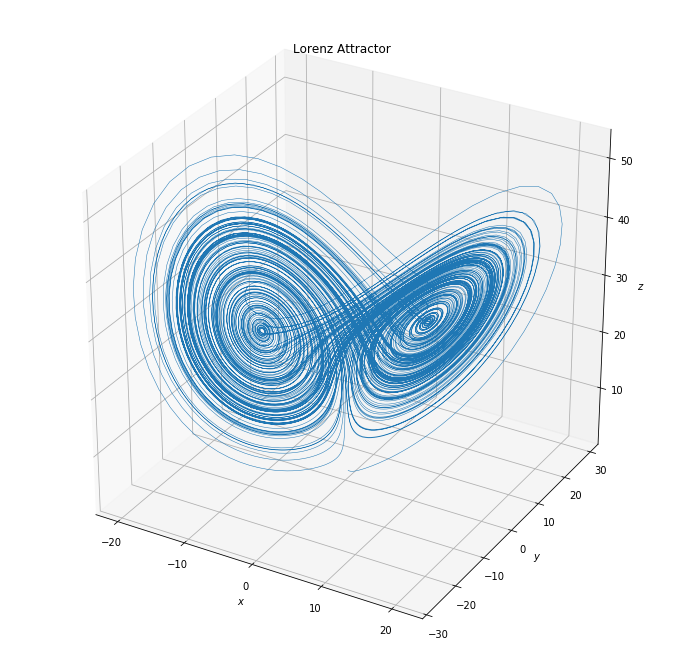

In [52]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


def lorenz(x, y, z, s=10, r=28, b=2.667):
    '''
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    '''
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot


dt = 0.01
num_steps = 20000

# Need one more for the initial values
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

# Set initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

# Plot
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("$x$") 
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")
ax.set_title("Lorenz Attractor")

plt.show()

### Rössler Attractor

<span style="font-size:large;">
\begin{align}
x' &= -y - z\\
y' &= x + ay\\
z' &= b + z(x - c)
\end{align}

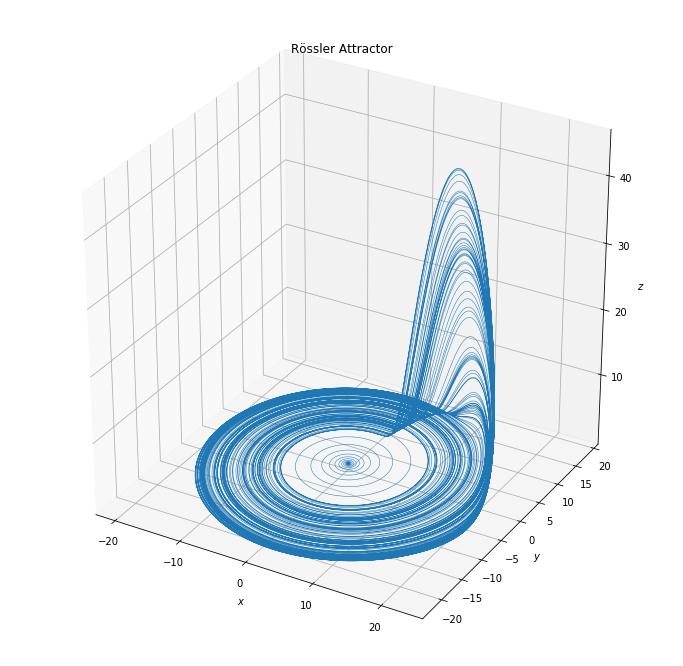

In [53]:
def rossler(x, y, z, a=0.1, b=0.1, c=14):
    x_dot = -y - z
    y_dot = x + a*y
    z_dot = b + z*(x - c)
    return x_dot, y_dot, z_dot

dt = 0.01
num_steps = 80000

# Need one more for the initial values
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

# Set initial values
xs[0], ys[0], zs[0] = (0.1, 0., 0.1)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = rossler(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

# Plot
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("$x$") 
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")
ax.set_title("Rössler Attractor")

plt.show()